<a href="https://colab.research.google.com/github/ManishKr19/Edureka-Data-Science/blob/main/Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as s
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
import pickle

In [3]:
df = pd.read_csv('/content/breast-cancer-data.csv')

In [4]:
df.shape

(569, 32)

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
df.diagnosis = df.diagnosis.astype('category')

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
X = df.drop(labels=['diagnosis', 'id'],axis=1)
Y= df['diagnosis']
col=X.columns

In [11]:
# apply PCA on X 
from sklearn.decomposition import PCA

pca = PCA(n_components=3) # what does this mean 
X_pca = pca.fit_transform(X)

print(X_pca)

X_pca = pd.DataFrame(X_pca, columns = ['PC1','PC2','PC3'])

[[1160.1425737  -293.91754364   48.57839763]
 [1269.12244319   15.63018184  -35.39453423]
 [ 995.79388896   39.15674324   -1.70975298]
 ...
 [ 314.50175618   47.55352518  -10.44240718]
 [1124.85811531   34.12922497  -19.74208742]
 [-771.52762188  -88.64310636   23.88903189]]


In [12]:
X_pca.head()

,PC1,PC2,PC3
0,1160.142574,-293.917544,48.578398
1,1269.122443,15.630182,-35.394534
2,995.793889,39.156743,-1.709753
3,-407.180803,-67.380320,8.672848
4,930.341180,189.340742,1.374801


In [13]:
print(X.shape)
X.head()

(569, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
print(pca.explained_variance_ratio_)

[0.98204467 0.01617649 0.00155751]


In [15]:
X_train,X_test,y_train,y_test = train_test_split(X_pca,Y, test_size = 0.2)

In [26]:
from sklearn.ensemble import RandomForestClassifier


# call 
rf = RandomForestClassifier(n_estimators = 500, random_state=42)
#fit 
rf.fit(X_train, y_train)
#predict 
y_pred_test = rf.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

print("true negative:", tn)
print("false positive:", fp)
print("false negative:", fn)
print("true positive:", tp)

true negative: 63
false positive: 1
false negative: 5
true positive: 45


In [28]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred_test)

print(cr)

              precision    recall  f1-score   support

           B       0.93      0.98      0.95        64
           M       0.98      0.90      0.94        50

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)

In [30]:
from sklearn.ensemble import RandomForestClassifier


# call 
rf = RandomForestClassifier(n_estimators = 500, random_state=42)
#fit 
rf.fit(X_train, y_train)
#predict 
y_pred_test = rf.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

print("true negative:", tn)
print("false positive:", fp)
print("false negative:", fn)
print("true positive:", tp)

true negative: 66
false positive: 0
false negative: 1
true positive: 47


In [32]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred_test)

print(cr)

              precision    recall  f1-score   support

           B       0.99      1.00      0.99        66
           M       1.00      0.98      0.99        48

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



# Feature Engineering

In [23]:
X.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Normalization and Feature Scaling 

In [ ]:
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:

# X = mms.transform(X)

df_norm = (X - X.mean()) / (X.max() - X.min())
df_norm = pd.concat([df_norm, Y], axis=1)

NameError: ignored

In [ ]:
# X=pd.DataFrame(X)
# X.columns=col

In [ ]:
df_norm.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,-0.032403,0.182815,-0.301307,0.213053,0.146813,0.198968,0.531437,0.495081,0.487976,0.306758,...,-0.222474,0.385173,0.279792,0.196998,0.399079,0.351207,0.518192,0.335156,0.229268,M
1,-0.032403,0.304923,-0.051392,0.282848,0.284671,-0.104905,-0.078833,-0.004450,0.105621,0.000193,...,-0.060427,0.256680,0.264308,-0.056585,-0.065649,-0.024432,0.245339,-0.029717,0.033282,M
2,0.059177,0.263274,0.066295,0.262808,0.232497,0.119524,0.170416,0.254453,0.392549,0.129991,...,-0.003924,0.225304,0.203602,0.079452,0.165163,0.142341,0.441216,0.140399,0.023837,M
3,0.059229,-0.128132,0.036874,-0.099434,-0.114014,0.416536,0.550761,0.357546,0.279726,0.396657,...,0.021929,-0.041791,-0.076898,0.511335,0.593799,0.331239,0.491044,0.736693,0.584115,M
4,0.059241,0.291671,-0.167388,0.298051,0.272369,0.035567,0.087292,0.255859,0.275253,-0.001323,...,-0.240065,0.223810,0.170669,0.033226,-0.047797,0.102086,0.164583,-0.105806,-0.047001,M


#  Visualization 

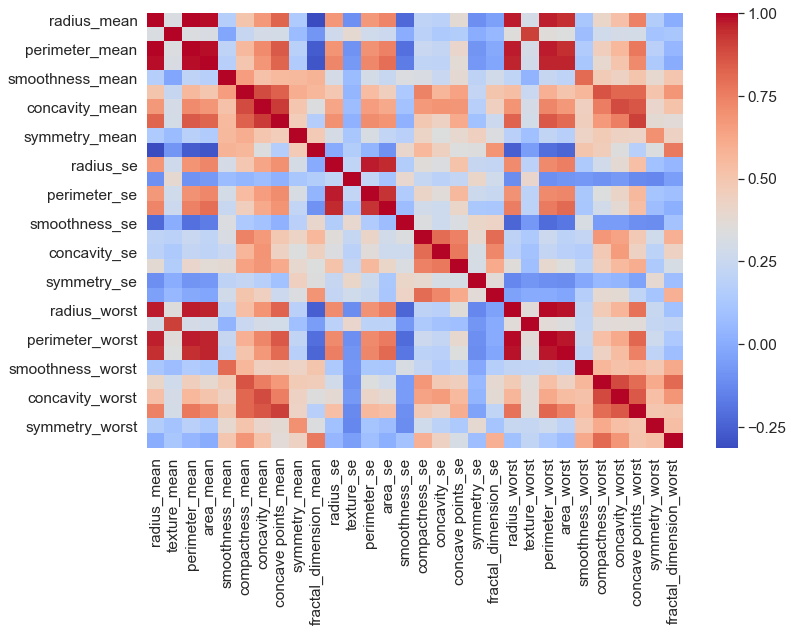

In [ ]:
#Explore correlations
plt.rcParams['figure.figsize']=(12,8)
s.set(font_scale=1.4)
s.heatmap(df.drop('diagnosis', axis=1).drop('id',axis=1).corr(), cmap='coolwarm')

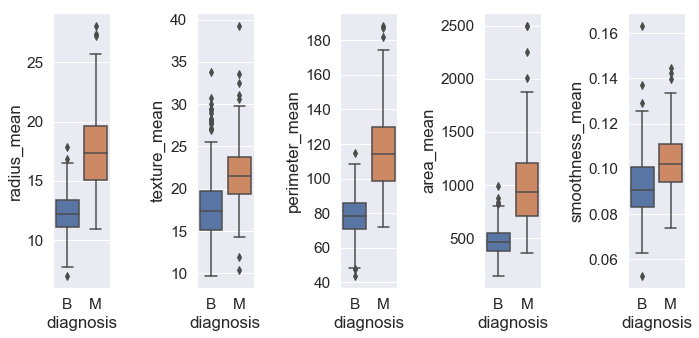

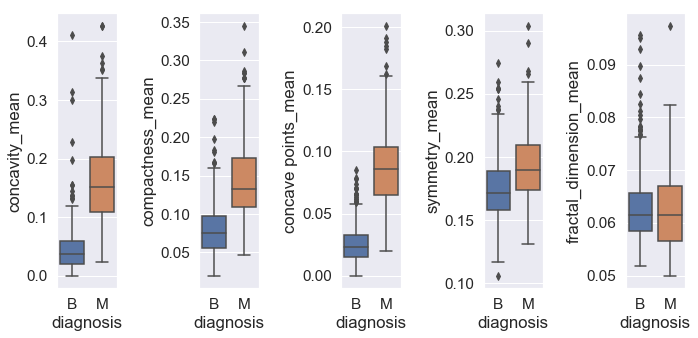

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
s.boxplot('diagnosis',y='radius_mean',data=df, ax=ax1)
s.boxplot('diagnosis',y='texture_mean',data=df, ax=ax2)
s.boxplot('diagnosis',y='perimeter_mean',data=df, ax=ax3)
s.boxplot('diagnosis',y='area_mean',data=df, ax=ax4)
s.boxplot('diagnosis',y='smoothness_mean',data=df, ax=ax5)
f.tight_layout()

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
s.boxplot('diagnosis',y='compactness_mean',data=df, ax=ax2)
s.boxplot('diagnosis',y='concavity_mean',data=df, ax=ax1)
s.boxplot('diagnosis',y='concave points_mean',data=df, ax=ax3)
s.boxplot('diagnosis',y='symmetry_mean',data=df, ax=ax4)
s.boxplot('diagnosis',y='fractal_dimension_mean',data=df, ax=ax5)    
f.tight_layout()

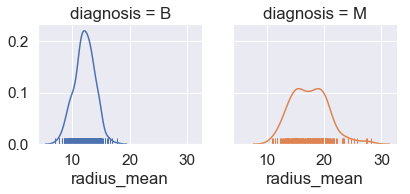

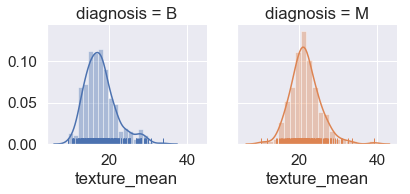

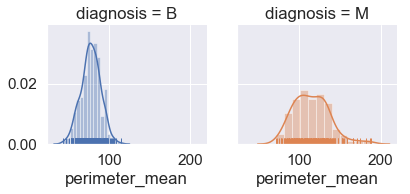

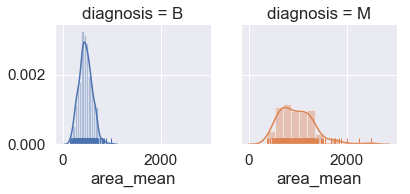

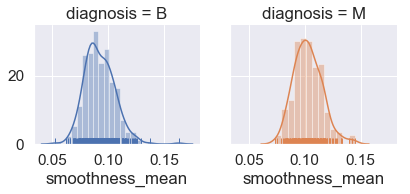

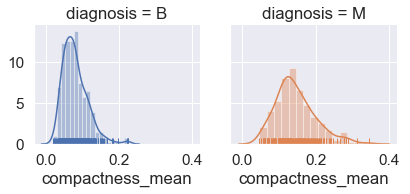

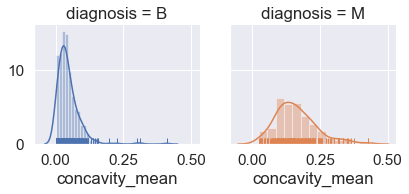

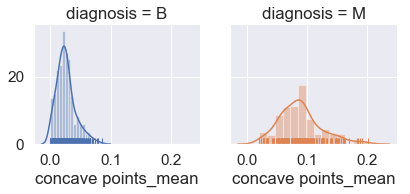

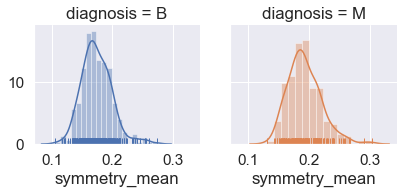

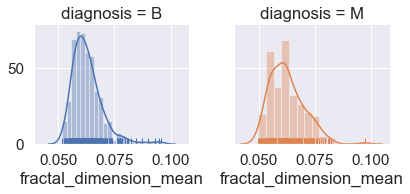

In [ ]:
g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "radius_mean", hist=False, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "texture_mean", hist=True, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "perimeter_mean", hist=True, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "area_mean", hist=True, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "smoothness_mean", hist=True, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "compactness_mean", hist=True, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "concavity_mean", hist=True, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "concave points_mean", hist=True, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "symmetry_mean", hist=True, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "fractal_dimension_mean", hist=True, rug=True)

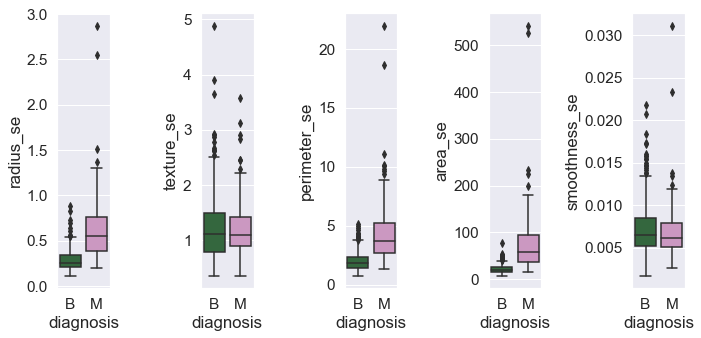

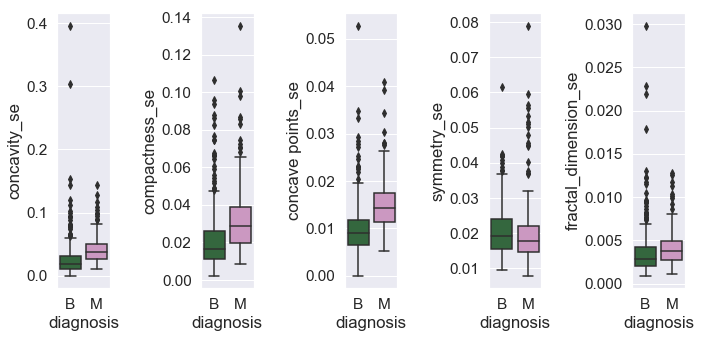

In [ ]:


#%%
plt.rcParams['figure.figsize']=(10,5)
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
s.boxplot('diagnosis',y='radius_se',data=df, ax=ax1, palette='cubehelix')
s.boxplot('diagnosis',y='texture_se',data=df, ax=ax2, palette='cubehelix')
s.boxplot('diagnosis',y='perimeter_se',data=df, ax=ax3, palette='cubehelix')
s.boxplot('diagnosis',y='area_se',data=df, ax=ax4, palette='cubehelix')
s.boxplot('diagnosis',y='smoothness_se',data=df, ax=ax5, palette='cubehelix')
f.tight_layout()

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
s.boxplot('diagnosis',y='compactness_se',data=df, ax=ax2, palette='cubehelix')
s.boxplot('diagnosis',y='concavity_se',data=df, ax=ax1, palette='cubehelix')
s.boxplot('diagnosis',y='concave points_se',data=df, ax=ax3, palette='cubehelix')
s.boxplot('diagnosis',y='symmetry_se',data=df, ax=ax4, palette='cubehelix')
s.boxplot('diagnosis',y='fractal_dimension_se',data=df, ax=ax5, palette='cubehelix')    
f.tight_layout()



In [ ]:
plt.rcParams['figure.figsize']=(10,5)
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
s.boxplot('diagnosis',y='radius_worst',data=df, ax=ax1, palette='coolwarm')
s.boxplot('diagnosis',y='texture_worst',data=df, ax=ax2, palette='coolwarm')
s.boxplot('diagnosis',y='perimeter_worst',data=df, ax=ax3, palette='coolwarm')
s.boxplot('diagnosis',y='area_worst',data=df, ax=ax4, palette='coolwarm')
s.boxplot('diagnosis',y='smoothness_worst',data=df, ax=ax5, palette='coolwarm')
f.tight_layout()

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
s.boxplot('diagnosis',y='compactness_worst',data=df, ax=ax2, palette='coolwarm')
s.boxplot('diagnosis',y='concavity_worst',data=df, ax=ax1, palette='coolwarm')
s.boxplot('diagnosis',y='concave points_worst',data=df, ax=ax3, palette='coolwarm')
s.boxplot('diagnosis',y='symmetry_worst',data=df, ax=ax4, palette='coolwarm')
s.boxplot('diagnosis',y='fractal_dimension_worst',data=df, ax=ax5, palette='coolwarm')    
f.tight_layout()

In [ ]:
Y.tail()

In [ ]:
X_norm = df_norm.drop(labels='diagnosis',axis=1)
Y_norm= df_norm['diagnosis']
col=X_norm.columns

le = LabelEncoder()
le.fit(Y_norm)

In [ ]:
Y_norm=le.transform(Y_norm)


In [ ]:
Y_norm=pd.DataFrame(Y_norm)
Y_norm.tail()

# Fitting the ML Model

In [ ]:
# Functionalize model fittting

def FitModel(X,Y,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)
    
    
    grid = GridSearchCV(
        estimator=algorithm,
        param_grid=gridSearchParams,
        cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
    
    
    grid_result = grid.fit(x_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(x_test)
    cm = confusion_matrix(y_test, pred)
   # metrics =grid_result.gr
    print(pred)
    pickle.dump(grid_result,open(algo_name,'wb'))
   
    print('Best Params :',best_params)
    print('Classification Report :',classification_report(y_test,pred))
    print('Accuracy Score : ' + str(accuracy_score(y_test,pred)))
    print('Confusion Matrix : \n', cm)

## SVC ML Model

In [ ]:
param ={
            'C': [0.1, 1, 100, 1000],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        }
FitModel(X_norm,Y_norm,'SVC_norm',SVC(),param,cv=5)

# Random Forest

In [ ]:
param ={
            'n_estimators': [100, 500, 1000, 2000],
           
        }
FitModel(X_norm,Y_norm,'Random Forest',RandomForestClassifier(),param,cv=10)

In [ ]:
np.random.seed(10)

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)


forest = RandomForestClassifier(n_estimators=1000)
fit = forest.fit(x_train, y_train)
accuracy = fit.score(x_test, y_test)
predict = fit.predict(x_test)
cmatrix = confusion_matrix(y_test, predict)

#--------------------------------------------------------------------------------------#
# Perform k fold cross-validation


print ('Accuracy of Random Forest: %s' % "{0:.2%}".format(accuracy))


In [ ]:
#%%Feature importances
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("feature %s (%f)" % (list(X)[f], importances[indices[f]]))

In [ ]:
feat_imp = pd.DataFrame({'Feature':list(X),
                        'Gini importance':importances[indices]})
plt.rcParams['figure.figsize']=(12,12)
s.set_style('whitegrid')
ax = s.barplot(x='Gini importance', y='Feature', data=feat_imp)
ax.set(xlabel='Gini Importance')
plt.show()

# XGBoost

In [ ]:
param ={
            'n_estimators': [100, 500, 1000, 2000],
           
        }
FitModel(X_norm,Y_norm,'XGBoost_norm',XGBClassifier(),param,cv=5)

# BALANCING THE DATASET

In [ ]:
df_norm.head()

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm =SMOTE(random_state=42)
X_res , Y_res = sm.fit_resample(X_norm,Y_norm)

In [ ]:
pd.Series(Y_res).value_counts()

In [ ]:
param ={
            'n_estimators': [100, 500, 1000, 2000],
           
        }
FitModel(X_res,Y_res,'Random Forest',RandomForestClassifier(),param,cv=10)

In [ ]:
param ={
            'C': [0.1, 1, 100, 1000],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        }
FitModel(X_res,Y_res,'SVC',SVC(),param,cv=5)

In [ ]:
param ={
            'n_estimators': [100, 500, 1000, 2000],
           
        }
FitModel(X_res,Y_res,'XGBoost',XGBClassifier(),param,cv=10)

# Feature Selection

In [ ]:
feat_imp.index = feat_imp.Feature

In [ ]:
feat_to_keep = feat_imp.iloc[1:15].index

In [ ]:

type(feat_to_keep),feat_to_keep


In [ ]:
X_res= pd.DataFrame(X_res)
Y_res = pd.DataFrame(Y_res)
X_res.columns = X_norm.columns

param ={
            'n_estimators': [100, 500, 1000, 2000],
           
        }
FitModel(X_res[feat_to_keep],Y_res,'Random Forest',RandomForestClassifier(),param,cv=10)

# Reloading the Saved Model

In [ ]:
loaded_model = pickle.load(open("XGBoost_norm","rb"))

In [ ]:

pred1 = loaded_model.predict(x_test)
loaded_model.best_params_